In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps
from scipy import optimize
from matplotlib.animation import FuncAnimation

# Constants/Setup

In [0]:
dx = 0.01 #Change in x
x0=0 #Initial position
xf= 5 #Final Position
nsteps=int(xf/dx)+1 #note that we take the integer part
Ef = 20 #Final energy value to test

#Finding Psi Behavior at the Boundary

In [0]:
def PsiBoundaryFinder(E):  #Given Energy Value, find Psi at the boundary

  x = np.linspace(x0,xf,nsteps)
  PsiPrime = np.zeros([nsteps])
  Psi = np.zeros([nsteps])
  PsiDoublePrime = np.zeros([nsteps])
  PsiPrime[0] = 1 #Given Initial PsiPrime Value
  Psi[1] = Psi[0]+PsiPrime[0]*dx  #Euler's Method to find Psi[1]
  PsiDoublePrime[1]= -2*(E-x[1])*Psi[1] #PsiDoublePrime[1] by definition
  PsiPrime[1]=PsiPrime[0]+PsiDoublePrime[1]*dx #Euler's Method to find PsiPrime[1]




  for i in range(0,nsteps-2):  #Bashforth-Adams Loop
          PsiDoublePrime[i+1]=-2*(E-x[i+1])*Psi[i+1]
          PsiPrime[i+2]=PsiPrime[i+1]+3/2*dx*PsiDoublePrime[i+1]-1/2*dx*PsiDoublePrime[i]
          Psi[i+2]=Psi[i+1]+3/2*dx*PsiPrime[i+1]-1/2*dx*PsiPrime[i]
  return (Psi[nsteps-1])  

  # ##4th order runge kutta
  # def dydx(x,y):
  #   return ((x-y)/2)
    
  # for i in range(0,nsteps-2): 
  #   #PsiPrime Runge Kutta
        
  #       y = PsiPrime[i+1]
  #       k1 = dx * dydx(x0, y) 
  #       k2 = dx * dydx(x0 + 0.5 * dx, y + 0.5 * k1) 
  #       k3 = dx * dydx(x0 + 0.5 * dx, y + 0.5 * k2) 
  #       k4 = dx * dydx(x0 + dx, y + k3) 
  
  #       # Update next value of y 
  #       PsiPrime[i+2] = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 
  
  #       # Update next value of x 
  #       x0 = x0 + dx 




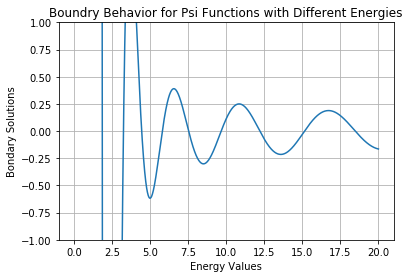

In [4]:
stepnum = 2000 #Number of E values tested 
E = np.linspace(0, Ef, stepnum)
ESolutions = np.zeros([stepnum])

for i in range (0, stepnum):
  ESolutions[i] = PsiBoundaryFinder(E[i])

#Graph
plt.plot(E,ESolutions)
plt.title('Boundry Behavior for Psi Functions with Different Energies')
plt.xlabel('Energy Values')
plt.ylabel('Bondary Solutions')
plt.ylim([-1,1])
plt.grid()
plt.show()

#Root Finder

In [0]:
def Rootfinder(A, final, rootstep ): 
  #A = -2    #Starting value of range
  #rootstep = 0.1   #Size of window
  B = A+rootstep    #Ending value of range
  #final = 50  #Last value tested

  Roots = []
  def f(x):
      return (PsiBoundaryFinder(x))
     
  while B<final:
    if ( (f(A)>0 and f(B)<0) or ( f(A)<0 and f(B)>0 ) ):
      root = optimize.brentq(f, A, B)
      Roots.append(round(root, 5))
    elif (f(A) == 0): Roots.append(A)
    A = A + rootstep
    B = B + rootstep
  print (Roots)
  return(Roots)

In [6]:

PsiRoots=Rootfinder (0, Ef, 0.1)  #Creates list of Roots from A to B in given stepsize
RootLength = (len(PsiRoots))  #Ammount of Roots
print (RootLength)

[1.85565, 3.24654, 4.44574, 5.80026, 7.52983, 9.66801, 12.20879, 15.14668, 18.47806]
9


#Plotting Psi Graphs for Energies

In [0]:
def PsiFinder(E):  #Given Energy Value, Return Psi Values

  x = np.linspace(x0,xf,nsteps)
  PsiPrime = np.zeros([nsteps])
  Psi = np.zeros([nsteps])
  PsiDoublePrime = np.zeros([nsteps])
  PsiPrime[0] = 1 #Given Initial PsiPrime Value
  Psi[1] = Psi[0]+PsiPrime[0]*dx  #Euler's Method to find Psi[1]
  PsiDoublePrime[1]= -2*(E-x[1])*Psi[1] #PsiDoublePrime[1] by definition
  PsiPrime[1]=PsiPrime[0]+PsiDoublePrime[1]*dx #Euler's Method to find PsiPrime[1]




  for i in range(0,nsteps-2):  #Bashforth-Adams Loop
          PsiDoublePrime[i+1]=-2*(E-x[i+1])*Psi[i+1]
          PsiPrime[i+2]=PsiPrime[i+1]+3/2*dx*PsiDoublePrime[i+1]-1/2*dx*PsiDoublePrime[i]
          Psi[i+2]=Psi[i+1]+3/2*dx*PsiPrime[i+1]-1/2*dx*PsiPrime[i]
  return (Psi)  

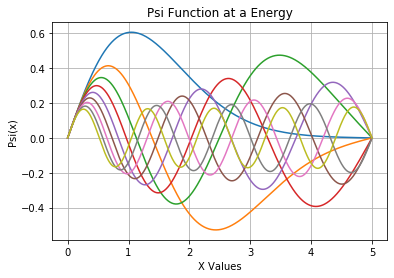

In [8]:
PsiValues = [] #Return Psi Values
for i in range (0, RootLength):
  PsiValues.append(PsiFinder(PsiRoots[i]))
  plt.plot(np.linspace(x0, xf, nsteps), PsiValues[i])

plt.title('Psi Function at a Energy')
plt.xlabel('X Values')
plt.ylabel('Psi(x)')
plt.grid()
plt.show()


#Normalizing

In [9]:
NormVals = [] #Scaling constants to normalize Psi Functions
for i in range (0, RootLength):
  NormVals.append (1/np.sqrt(simps(PsiValues[i]**2)))   #Normalizing Constant

NormalizedPsiValues = [] #Return Normalized Psi Values
for i in range (0, RootLength):
  
  NormalizedPsiValues.append (  )
  plt.plot(np.linspace(x0, xf, nsteps), PsiValues[i])

TypeError: ignored

In [0]:
PsiValues[0] = PsiFinder(PsiRoots[0])
denom = 1/np.sqrt(simps(PsiValues[0]**2))
print (denom)
before = simps(PsiValues[0]**2)
print (before)

for i in range (0,500):
  PsiValues[0][i] = PsiValues[0][i] * denom

after = simps(PsiValues[0]**2)
print (after)
print (after/before)

plt.plot(np.linspace(x0, xf, nsteps), PsiValues[0])
plt.title('Psi Function at a Energy')
plt.xlabel('X Values')
plt.ylabel('Psi(x)')
plt.grid()
plt.show()

#Animation

In [0]:
#Animating Psi Function

fig = plt.figure()
ax = plt.axes(xlim=(-1, 6), ylim=(-1, 1))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 20, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,


anim = FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')

